# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [71]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [72]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


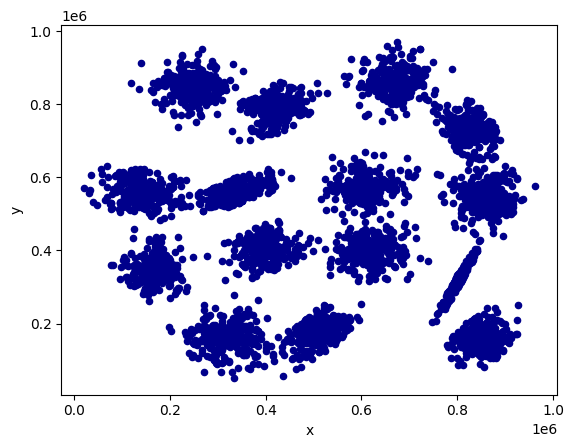

In [73]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5000 non-null   int64
 1   y       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [75]:
data['x'] = data['x'].astype(float)
data['y'] = data['y'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5000 non-null   float64
 1   y       5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [77]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 16):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    inertia.append(model.inertia_)
inertia
#END CODE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[343183593424387.56,
 213509053896740.1,
 138250712993153.72,
 104935513328366.25,
 79769015011631.75,
 63576882802374.31,
 48146924629521.43,
 40427232568036.41,
 34391383382175.71,
 29182766793530.79,
 23146652003743.793,
 18510279267119.28,
 13486733767168.459,
 8917615616867.258]

In [78]:
inertia_data = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(2, 16)])
inertia_data

,Inertia
2,3.431836e+14
3,2.135091e+14
4,1.382507e+14
5,1.049355e+14
6,7.976902e+13
7,6.357688e+13
8,4.814692e+13
9,4.042723e+13
10,3.439138e+13
11,2.918277e+13


Text(0.5, 1.0, 'Elbow Method')

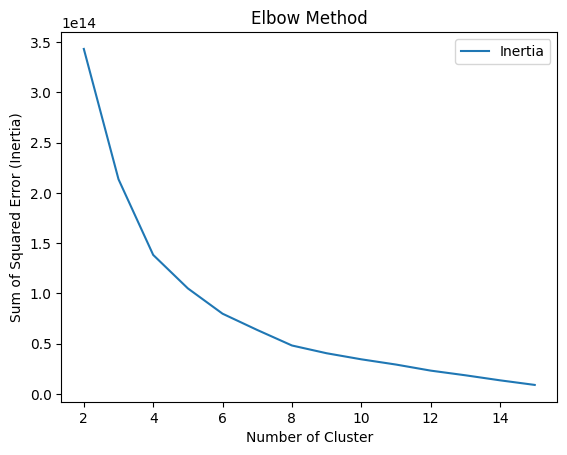

In [80]:
inertia_data.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [82]:
model = KMeans(n_clusters=k, random_state=0)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=0)

In [84]:
model.predict(data)

array([10, 10, 10, ...,  3,  3,  3], dtype=int32)

In [85]:
data['Cluster'] = model.predict(data)
data

,x,y,Cluster
0,664159.0,550946.0,10
1,665845.0,557965.0,10
2,597173.0,575538.0,10
3,618600.0,551446.0,10
4,635690.0,608046.0,10
...,...,...,...
4995,665426.0,853940.0,3
4996,691827.0,863963.0,3
4997,650661.0,861267.0,3
4998,599647.0,858702.0,3


In [86]:
data['Cluster'].value_counts()
#END CODE

3     352
1     351
13    351
2     349
8     345
0     341
6     340
7     335
5     334
9     329
4     327
14    319
11    316
12    314
10    297
Name: Cluster, dtype: int64

In [88]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
kmeans = cluster.KMeans(n_clusters=15, random_state=0)
kmeans.fit(data)
label = kmeans.predict(data)
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score= 0.7112786144370552


## Proses Visualisasi hasil CLuster

In [90]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['Cluster'] = label
result.head()
#END CODE

,x,y,Cluster
0,664159.0,550946.0,10
1,665845.0,557965.0,10
2,597173.0,575538.0,10
3,618600.0,551446.0,10
4,635690.0,608046.0,10


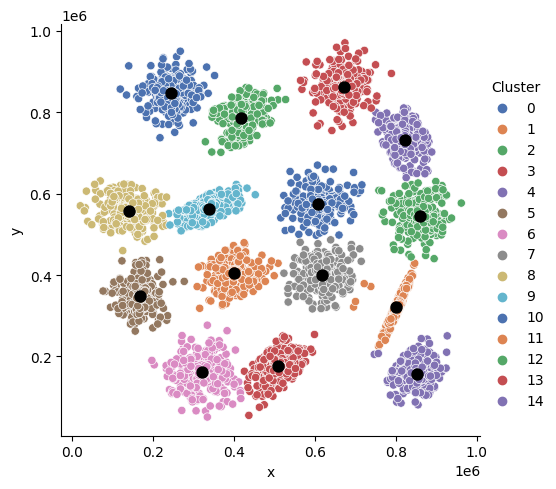

In [92]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', data=result, hue='Cluster', palette='deep')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            color='black', marker='.', s=250)
plt.show()
#END CODE

Kesimpulan:

Berdasarkan nilai Silhouette Score 0.7112786144370552 untuk 15 cluster, dapat disimpulkan bahwa dalam kasus ini, model dengan 15 cluster memberikan hasil yang terbaik. Silhouette Score adalah metrik yang digunakan untuk mengukur seberapa baik pengelompokan (clustering) telah dilakukan, dan skor tersebut menunjukkan sejauh mana titik-titik dalam satu cluster berdekatan satu sama lain dan terpisah dari titik-titik dalam cluster lain.

Dengan skor Silhouette yang tinggi, ini menunjukkan bahwa pengelompokan menjadi 15 cluster menghasilkan kelompok yang cukup terdefinisi dengan baik, di mana titik-titik dalam cluster memiliki kedekatan yang tinggi dan terpisah dengan baik dari titik-titik dalam cluster lain.